In [ ]:
# Midbootcamp Project - Financial Risk Analyst - Logistic Regression

# Import Libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
%matplotlib inline

# Load Data

In [3]:
credit = pd.read_csv('../datasets/creditcardmarketing.csv')

In [4]:
credit

,1,No,Air Miles,Letter,High,1.1,No.1,High.1,2,1.2,4,No.2,1160.75,1669,877,1095,1002
0,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
1,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
2,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
3,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
4,6,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847.0,1365.0,750.0,497.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17994,17996,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17995,17997,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17996,17998,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17997,17999,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


In [ ]:
# check target variable

In [5]:
credit.No.value_counts()

No     16976
Yes     1023
Name: No, dtype: int64

## rename columns

In [6]:
columns_mapper = {'1':'customer', 
                  'No':'accept', 
                  'Air Miles':'reward', 
                  'Letter':'m_type', 
                  'High':'income', 
                  '1.1':'accounts', 
                  'No.1':'overdraft',
                  'High.1': 'rating', 
                  '2': 'cards', 
                  '1.2': 'homes', 
                  '4':'family', 
                  'No.2': 'Owner', 
                  '1160.75':'q1',
                  '1669':'q2',
                  '877':'q3',
                  '1095':'q4',
                  '1002':'balance'}

In [ ]:
# The balance seems to be the average balance for each quarter in the last year

In [8]:
credit = credit.rename(columns=columns_mapper)
credit.head()

,customer,accept,reward,m_type,income,accounts,overdraft,rating,cards,homes,family,Owner,q1,q2,q3,q4,balance
0,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
1,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
2,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
3,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
4,6,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847.0,1365.0,750.0,497.0


In [ ]:
# Save customer column

In [9]:
customer = credit.customer

In [10]:
credit = credit.iloc[:,1:]

<bound method NDFrame.head of       accept     reward    m_type  income  accounts overdraft  rating  cards  \
0         No  Air Miles    Letter  Medium         1        No  Medium      2   
1         No  Air Miles  Postcard    High         2        No  Medium      2   
2         No  Air Miles    Letter  Medium         2        No    High      1   
3         No  Air Miles    Letter  Medium         1        No  Medium      2   
4         No  Air Miles    Letter  Medium         1        No    High      3   
...      ...        ...       ...     ...       ...       ...     ...    ...   
17994     No  Cash Back    Letter    High         1        No     Low      1   
17995     No  Cash Back    Letter    High         1        No     Low      3   
17996     No  Cash Back    Letter    High         1        No     Low      2   
17997     No  Cash Back    Letter  Medium         1        No  Medium      4   
17998     No  Cash Back    Letter     Low         2        No  Medium      2   

       ho

In [11]:
credit.head()

,accept,reward,m_type,income,accounts,overdraft,rating,cards,homes,family,Owner,q1,q2,q3,q4,balance
0,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
1,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
2,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
3,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
4,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847.0,1365.0,750.0,497.0


# EDA

In [ ]:
# check data types

In [12]:
credit.dtypes

accept        object
reward        object
m_type        object
income        object
accounts       int64
overdraft     object
rating        object
cards          int64
homes          int64
family         int64
Owner         object
q1           float64
q2           float64
q3           float64
q4           float64
balance      float64
dtype: object

In [ ]:
# Appart from the balance columns all the other features could be considered categorical: nominal or ordinals

## General info

In [13]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17999 entries, 0 to 17998
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   accept     17999 non-null  object 
 1   reward     17999 non-null  object 
 2   m_type     17999 non-null  object 
 3   income     17999 non-null  object 
 4   accounts   17999 non-null  int64  
 5   overdraft  17999 non-null  object 
 6   rating     17999 non-null  object 
 7   cards      17999 non-null  int64  
 8   homes      17999 non-null  int64  
 9   family     17999 non-null  int64  
 10  Owner      17999 non-null  object 
 11  q1         17975 non-null  float64
 12  q2         17975 non-null  float64
 13  q3         17975 non-null  float64
 14  q4         17975 non-null  float64
 15  balance    17975 non-null  float64
dtypes: float64(5), int64(4), object(7)
memory usage: 2.2+ MB


In [14]:
credit.describe()

,accounts,cards,homes,family,q1,q2,q3,q4,balance
count,17999.000000,17999.000000,17999.000000,17999.000000,17975.000000,17975.000000,17975.000000,17975.000000,17975.000000
mean,1.255792,1.903495,1.203456,3.499028,940.503310,910.408456,999.398999,1042.030654,810.175132
std,0.472510,0.797031,0.427350,1.114207,350.303729,620.068494,457.414081,553.467854,559.015084
min,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,3.000000,787.500000,392.500000,663.000000,633.000000,363.000000
50%,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.000000,703.000000
75%,1.000000,2.000000,1.000000,4.000000,1153.125000,1521.000000,1342.000000,1463.000000,1212.000000
max,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


In [15]:
credit.describe(include=['object'])

,accept,reward,m_type,income,overdraft,rating,Owner
count,17999,17999,17999,17999,17999,17999,17999
unique,2,3,2,3,2,3,2
top,No,Air Miles,Postcard,Medium,No,High,Yes
freq,16976,6060,9147,9013,15321,6070,11655


In [17]:
credit.isna().sum()

accept        0
reward        0
m_type        0
income        0
accounts      0
overdraft     0
rating        0
cards         0
homes         0
family        0
Owner         0
q1           24
q2           24
q3           24
q4           24
balance      24
dtype: int64

## Explore single variables

In [18]:
for c in credit.columns:
    print(credit[c].nunique(), c)

2 accept
3 reward
2 m_type
3 income
3 accounts
2 overdraft
3 rating
4 cards
3 homes
8 family
2 Owner
4728 q1
2158 q2
1945 q3
2281 q4
2184 balance


In [19]:
credit.family.value_counts()

3    5712
4    5542
5    2853
2    2813
1     539
6     538
8       1
9       1
Name: family, dtype: int64

## Discrete variables

In [20]:
def continuous_discrete(df,n=10):
    """divides a data frame into continuous and discrete variables
    based on n, the number of classes."""
    cont = []
    disc = []
    for c in df.columns:
        if df[c].nunique() >= n:
            cont.append(c)
        else:
            disc.append(c)
    
    continuous_df = df[cont]
    discret_df = df[disc]
    
    return continuous_df, discret_df

In [21]:
conti, disc = continuous_discrete(credit,10)

In [22]:
def plotDiscrete(df):
    """Countplots for a dataframe of discrete variables"""
    for c in df.columns:
        ax = sns.countplot(x=c,data=df)
        plt.title(c)
        plt.xlabel(None)
        plt.tick_params(axis='x', labelrotation=55)
        # annotate
        ax.bar_label(ax.containers[0], label_type='edge')

        # pad the spacing between the number and the edge of the figure
        ax.margins(y=0.1)
        
        plt.show()

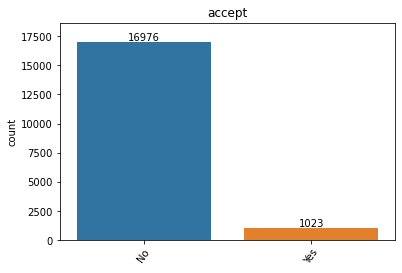

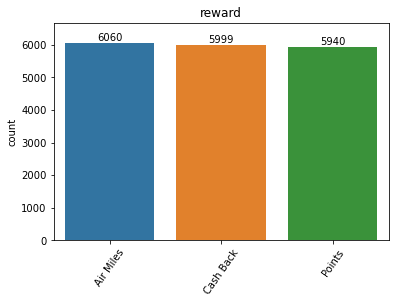

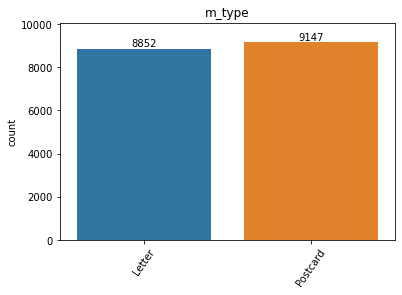

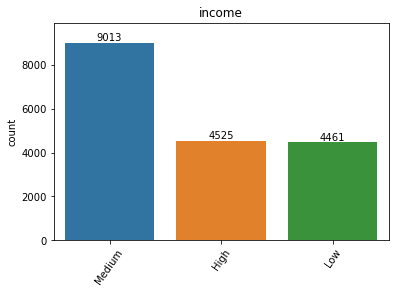

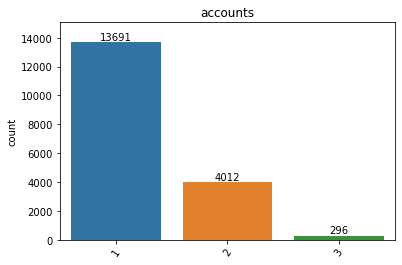

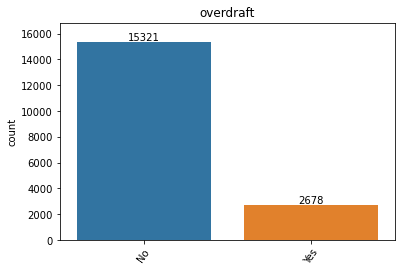

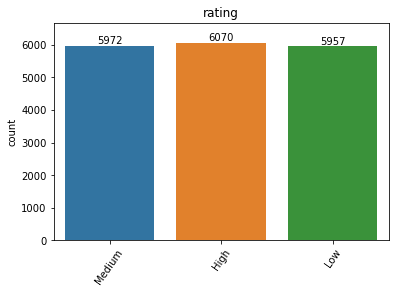

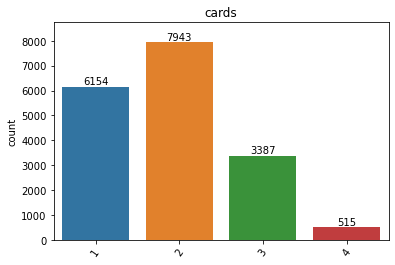

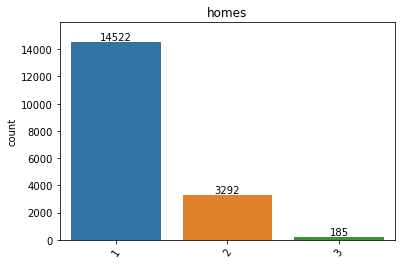

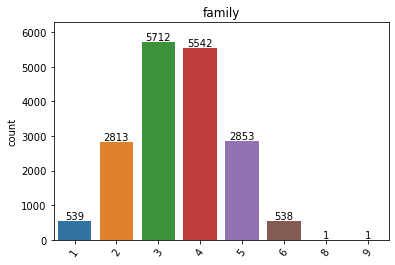

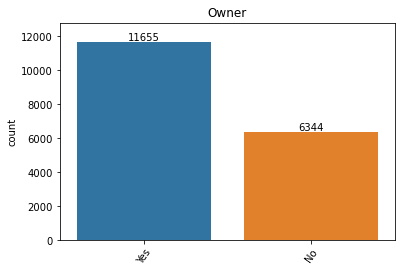

In [25]:
plotDiscrete(disc)

In [38]:
ordinals = ['family', 'homes', 'cards', 'rating', 'accounts', 'income']

In [39]:
nominals = []
for f in disc.columns:
    if f not in ordinals:
        nominals += [f]
nominals

['accept', 'reward', 'm_type', 'overdraft', 'Owner']

## Continuous variables

### Histograms

In [28]:
def plotContinuous(df):
    """Histplots for a dataframe of continuous variables"""
    for c in df.columns:
        sns.histplot(x=c,data=df, kde=True)
        plt.title(c)
        plt.xlabel(None)
        plt.tick_params(axis='x', labelrotation=55)
        plt.show()

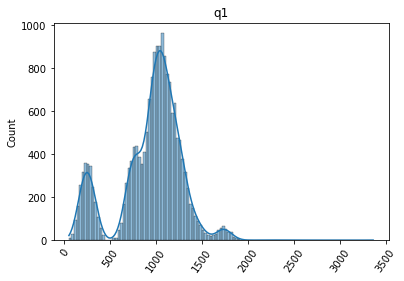

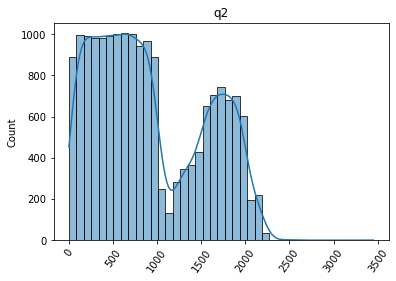

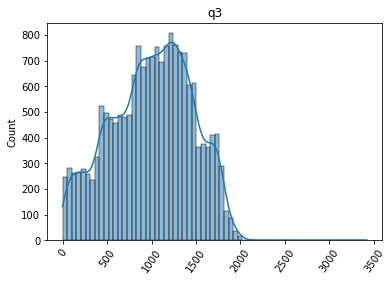

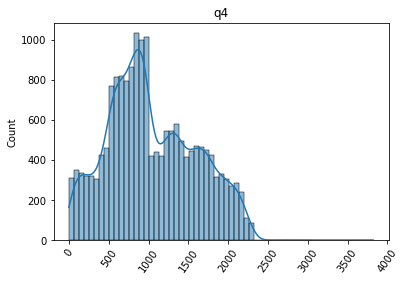

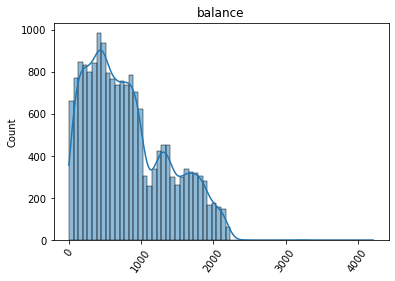

In [29]:
plotContinuous(conti)

In [30]:
conti.skew()

q1        -0.572253
q2         0.411053
q3        -0.183032
q4         0.289637
balance    0.641226
dtype: float64

__There is no relevant skewness__

In [31]:
conti.std()

q1         350.303729
q2         620.068494
q3         457.414081
q4         553.467854
balance    559.015084
dtype: float64

In [32]:
conti.mean()

q1          940.503310
q2          910.408456
q3          999.398999
q4         1042.030654
balance     810.175132
dtype: float64

### Outliers

In [33]:
def plotOutliers(df):
    """Boxplots for a dataframe of continuous variables"""
    for c in df.columns:
        sns.set_theme(style="whitegrid")
        ax = sns.boxplot(x=c, data=df, orient='h')
        plt.title(c)
        plt.xlabel(None)
        #plt.tick_params(axis='x', labelrotation=55)
        plt.show()

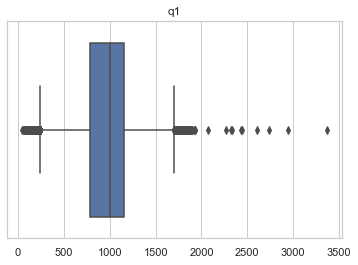

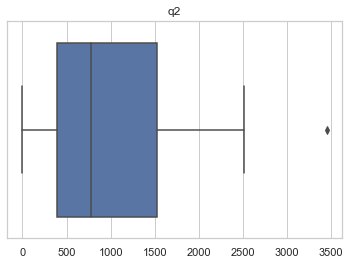

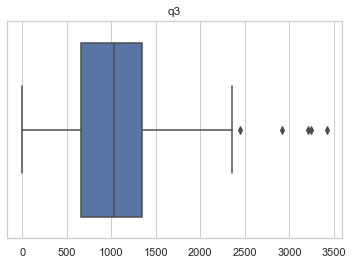

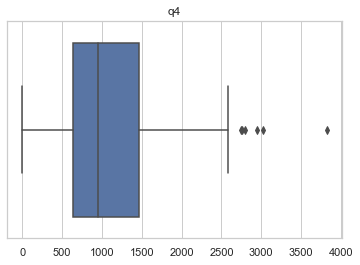

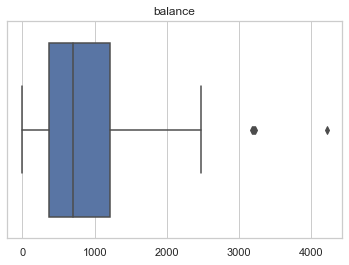

In [34]:
plotOutliers(conti)

There are some outliers.

### Correlations

In [35]:
def corrPlots(df):
    """ Plots correlation matrix, heatmap and pairplot"""
    display(df.corr())
    sns.heatmap(round(df.corr(),3), vmin = -1, vmax = 1, cmap = 'RdBu', annot=True)
    plt.show()
    sns.pairplot(df)
    plt.show()

,q1,q2,q3,q4,balance
q1,1.000000,0.481490,0.800305,0.752746,0.572376
q2,0.481490,1.000000,0.483173,-0.060970,-0.237317
q3,0.800305,0.483173,1.000000,0.487712,0.168961
q4,0.752746,-0.060970,0.487712,1.000000,0.565298
balance,0.572376,-0.237317,0.168961,0.565298,1.000000


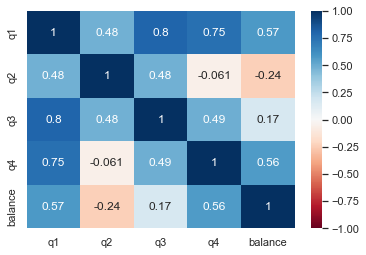

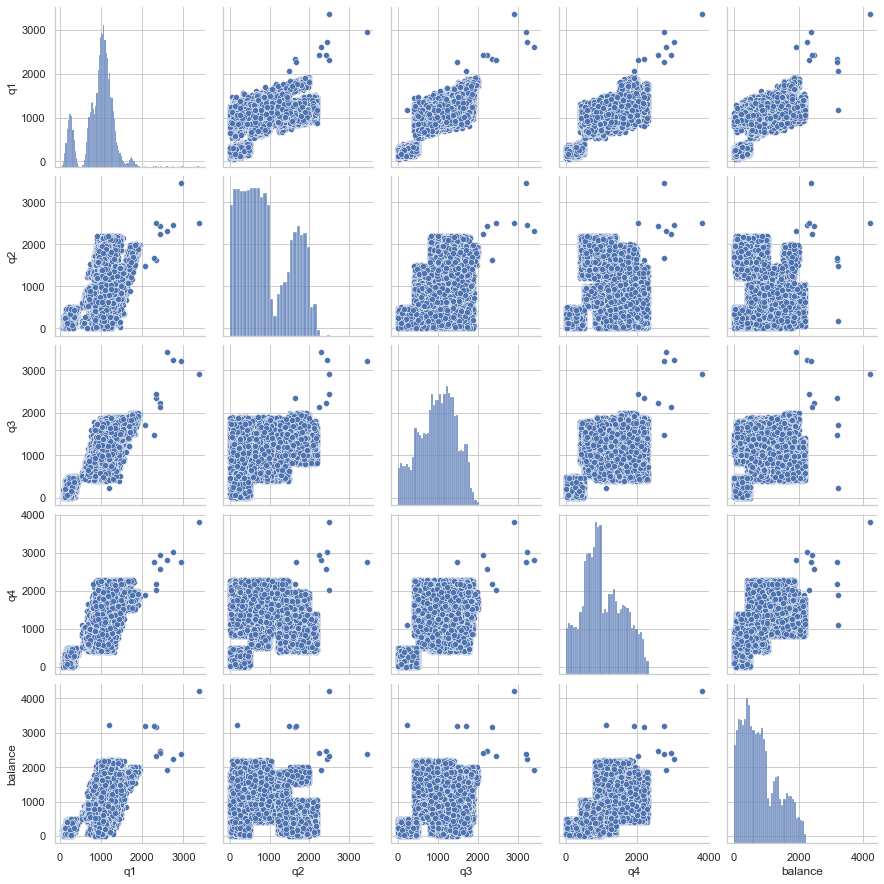

In [36]:
corrPlots(conti)

__There is multicollinearity!__  
q3 coulb be dropped

## Explore variables in pairs

In [ ]:
# Compute class imbalance in accept

In [44]:
# Count acceptance
count_accept = disc.accept.value_counts()
count_accept

No     16976
Yes     1023
Name: accept, dtype: int64

In [43]:
# Percentage of acceptance
100*(count_accept/len(disc))

No     94.316351
Yes     5.683649
Name: accept, dtype: float64

In [45]:
print("The class imbalance ratio is: {:.2f}".format((count_accept[0]-count_accept[1])/(count_accept[0]+count_accept[1])))



The class imbalance ratio is: 0.89


### Filter accepted customers

In [46]:
disc_accepted = disc[disc.accept == 'Yes']

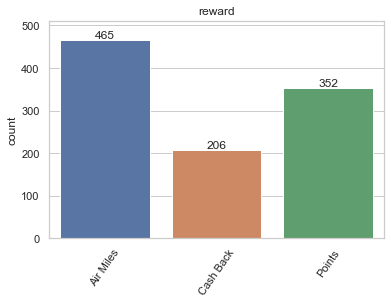

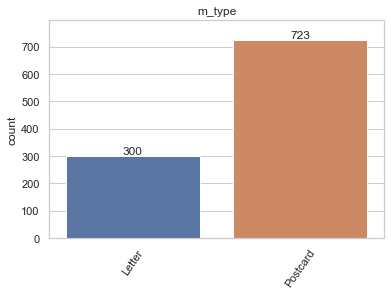

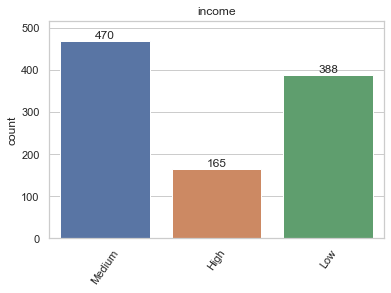

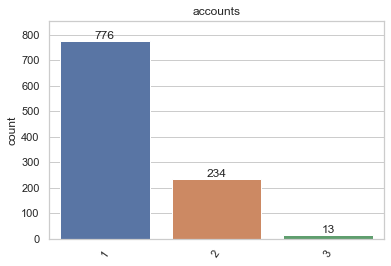

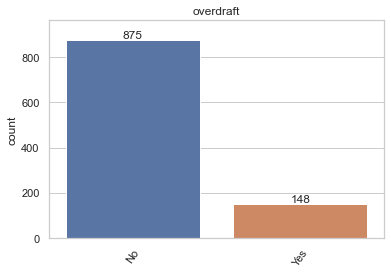

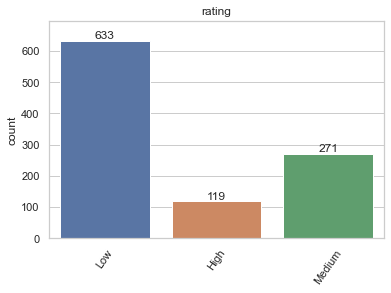

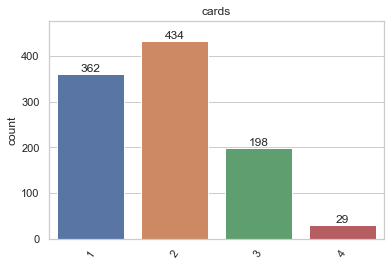

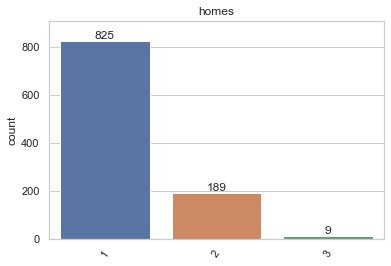

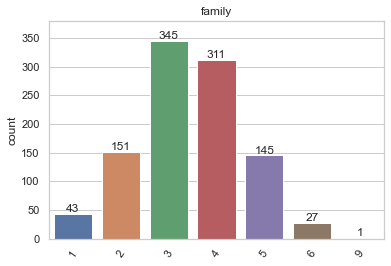

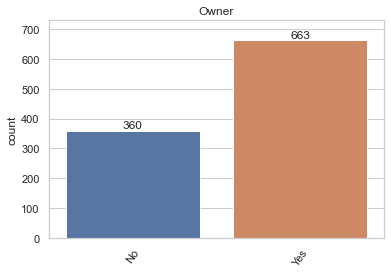

In [48]:
plotDiscrete(disc_accepted.iloc[:,1:])

### Plot discrete features against accepted.

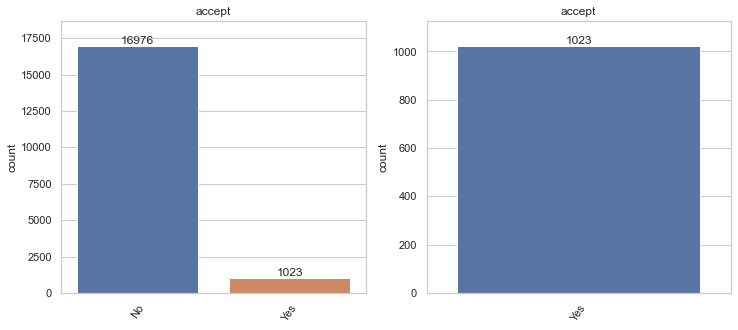

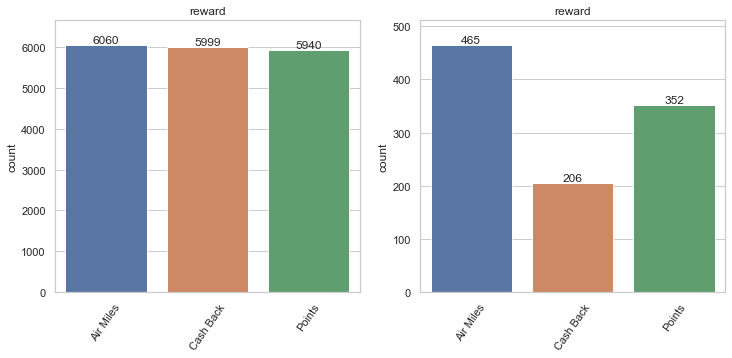

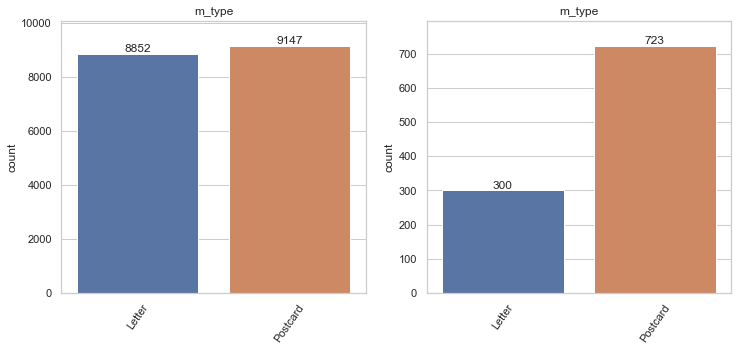

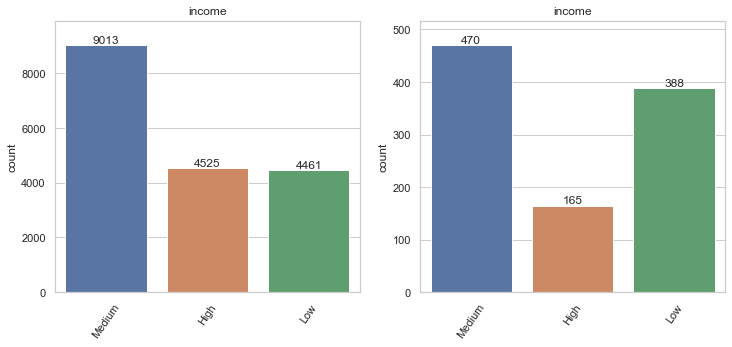

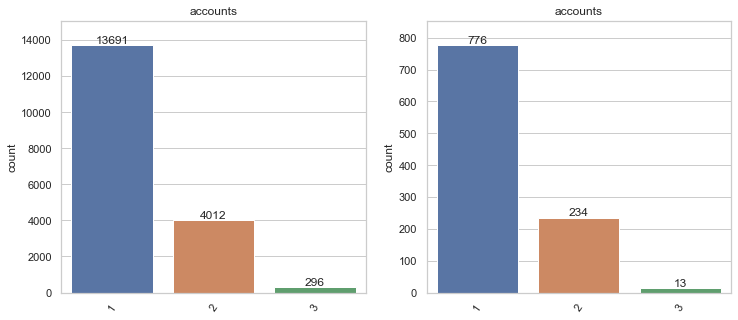

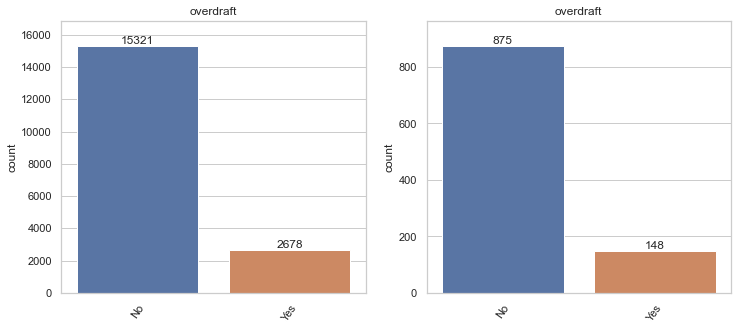

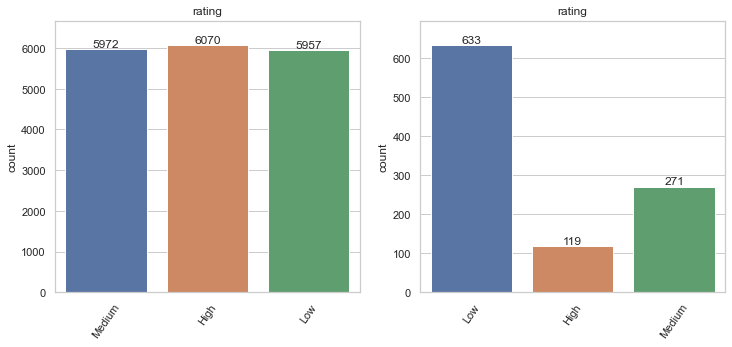

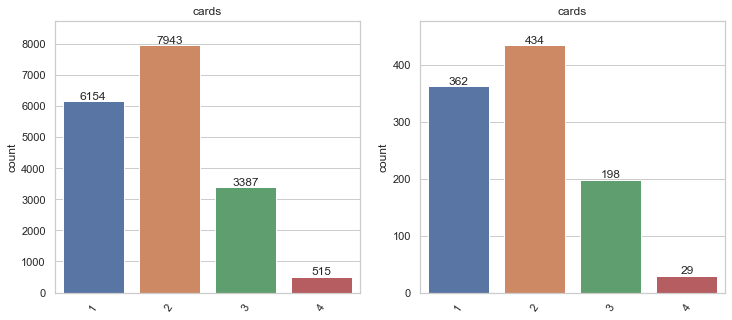

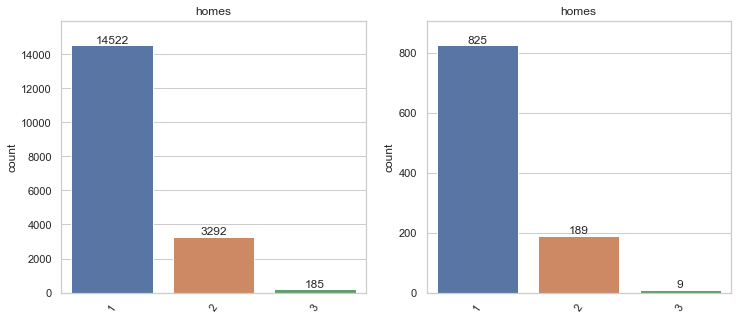

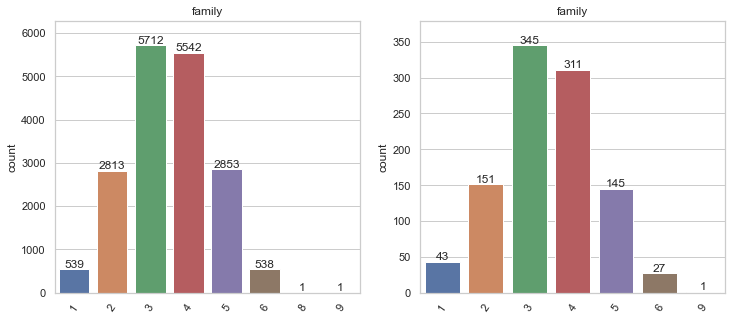

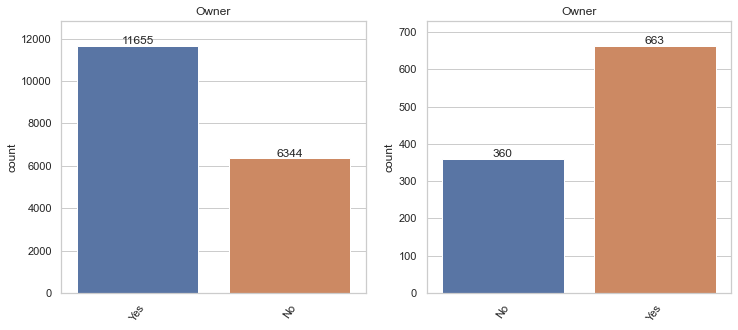

In [66]:

for i,c in enumerate(disc.columns):
    f, ax = plt.subplots(1,2, figsize=(12,5))
    sns.countplot(x=c,data=disc, ax=ax[0])
    sns.countplot(x=c,data=disc_accepted,ax=ax[1])
    # plt.title(c)
    ax[0].set_title(c)
    ax[0].set_xlabel(None)
    ax[0].tick_params(axis='x', labelrotation=55)
    
    ax[1].set_title(c)
    ax[1].set_xlabel(None)
    ax[1].tick_params(axis='x', labelrotation=55)
    
        # annotate
    ax[0].bar_label(ax[0].containers[0], label_type='edge')
    ax[1].bar_label(ax[1].containers[0], label_type='edge')

        # pad the spacing between the number and the edge of the figure
    ax[0].margins(y=0.1)
    ax[1].margins(y=0.1)
    plt.show()
        


There is a significant preference to Air Miles and Postcards.  
Also low (and medium) income and (low and medium) rating accept easier.  


### Violin plot continuous

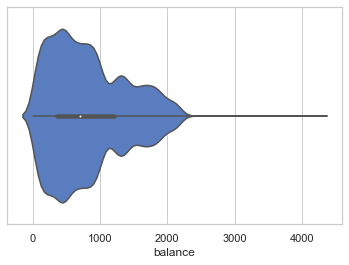

In [74]:
#sns.violinplot(x='balance', hue='accept', data = credit, split=True, palette='muted')
#plt.show()
# It does not work

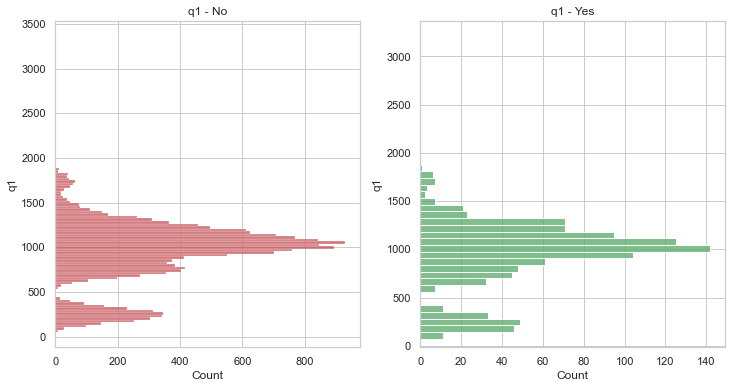

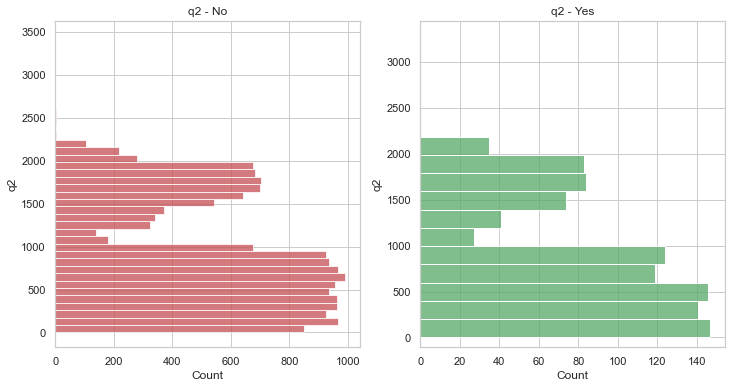

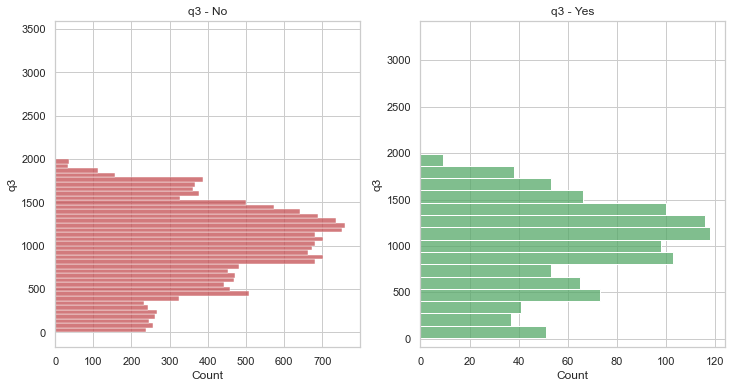

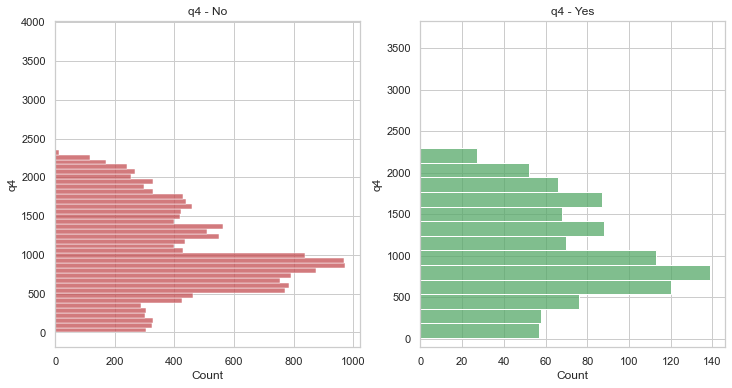

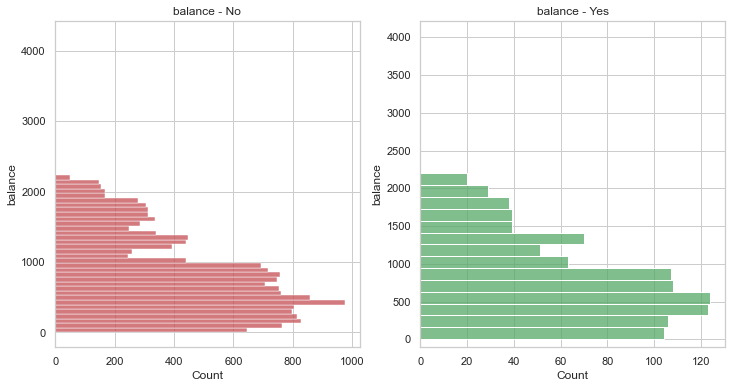

In [86]:
for f in conti.columns:
    fig, ax = plt.subplots(1,2, figsize=(12,6))
    sns.histplot(y=credit[f][credit.accept == 'No'], ax=ax[0], color ='r')
    sns.histplot(y=credit[f][credit.accept == 'Yes'], ax=ax[1], color='g')
    ax[0].set_title('%s - No'%(f))
    ax[1].set_ylim(ymax=max(credit[f][credit.accept == 'No']))
    ax[1].set_title('%s - Yes'%(f))
    plt.show()

# Data Cleaning